In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

This exercise consists of 3 parts. Finish the first part to get the mark of 3.0. The first 2 parts to get 4.0. Finish all parts to get 5.0.

# Part 1: Linear layer

1.1) Let us start with a linear regression problem. Consider a linear function with a noise: $y = a*x+b + noise$.

We use this formula to generate $100$ random smaples.

In [6]:
### The number of samples
n = 100 
### parameters of the linear function
a = -2 
b = 3

1.2) Now, let us generate 100 samples and plot them. 

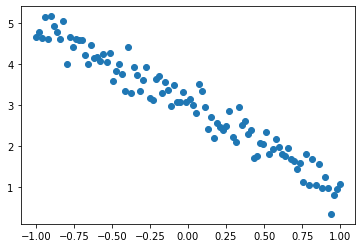

In [7]:
### generate equally spaced x-values
x = np.linspace(-1, 1, n) 
### generate y-values (we use a numpy library so we can generate a vector of numbers - y - inline)
y = a * x + b + np.random.normal(scale=0.25, size=n)

plt.scatter(x, y)

1.3) As you may see, the samples are placed - more or less - along a single line.
Now, our aim is to find the best parameters for a linear function 
so that such defined model describes the given data in the best possible way. For this reason, we will iteratively search the parameter space and thus update the model. Firstly, we need to define an error function. This function will inform how well (or bad) the instantiated model describes the data. For this reason, we use a mean square error function. <br>

We define a mean square error function as:<br>
$\dfrac{\sum\left(y_i - \widehat{y}_i \right)^2}{n} = MSE,$

where $y$ are the target (i.e., data values) and $\widehat{y}$ are the output (i.e., model's) values. <br>

See the MSE (mean square error) function given below.

In [8]:
def mse(y_target, y_calc):
    return ((y_target - y_calc) ** 2).mean()

1.4) Run the below code for different parameters of the model. Which paramter values give the best (i.e., minimal) MSE?

MSE  =  1.0690643460580462


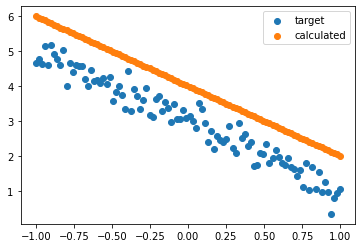

In [9]:
a_2 = -2
b_2 = 4

y_calc = a_2 * x + b_2
print("MSE  =  " + str(mse(y, y_calc)))

plt.scatter(x, y, label="target")
plt.scatter(x, y_calc, label="calculated")
plt.legend()

1.5) We want to find the best possible model parameters automatically. For this reason, we use a gradient of a loss function. The gradient informs what is the direction of the fastest increase/decrease of a given function. We use this information to update both model parameters. This procedure will be performed iterativelly. In each iteration, the parameters a and b will be slightly modififed such that MSE will be reduced (i.e., improved). <br>

Firstly, finish the below function. It should calculate a batch gradient of a loss function, i.e., **MSE for each point separately** (y_target, and y_calc are array,  not just scalars, so output also should be array).

In [ ]:
def mse_grad(y_target, y_calc):
    ### TODO
    ### return 0


### TEST
print(mse_grad(y, y_calc))

1.6) Fill the update function to calculate gradient of parameter $a$ and $b$ basing on a gradient of loss function (grad_y) and input vector (x).
Then update the parameter $a$ and $b$ base on their gradients and learning rate (lr). To update parameters use batch gradient descent.

In [ ]:
class LinearLayer:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return self.a * x + self.b

    def update(self, x, grad_y, lr):
        #TODO



1.7) Write Step function which calculates: y_calc output of the model base on input x, loss of the model, gradient of loss, and update the model parameters.

In [ ]:
def Step(x, y, model, lr):
    #TODO

    return y_calc, loss

1.8) Fit the model for 100 epochs, with learning rate 0.05, and with initial value of parameters a = 1.1, and b = 2.

In [ ]:
model = LinearLayer(1.1, 2)

In [18]:
lr = 0.05

In [ ]:
epoch = 100
losses = []
for i in range(epoch):
    y_calc, loss = Step(x, y, model, lr)
    losses.append(loss)

In [ ]:
plt.plot(losses)

Animation of the learning process

In [20]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [21]:
model = LinearLayer(1.1, 2)

In [ ]:
fig = plt.figure()
plt.scatter(x, y)
line, = plt.plot(x, y_calc, ".", c="orange")
plt.close()


def animate(i):
    y_calc, loss = Step(x, y, model, lr)
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, epoch), interval=20)

1.9) There is an example it can be done in pytorch.

In [2]:
# Imports
import torch
import torch.nn as nn

In [10]:
# Convert numpy array to torch tensor, [:,None] add an additional dimension
xt = torch.FloatTensor(x[:, None])
yt = torch.FloatTensor(y[:, None])

In [11]:
def mse(y_target, y_calc):
    return ((y_target - y_calc) ** 2).mean()

In [12]:
class LinearLayer(nn.Module):
    def __init__(self, a, b):
        super(LinearLayer, self).__init__()  # initialize torch functionality
        # change a and b to float tensor, and next to parameters,
        # the main difference between tensor and parameter is that parameter keeps information about calculations,
        # which is used to calculate gradients
        self.a = nn.Parameter(torch.FloatTensor([a]).view(1, 1))
        self.b = nn.Parameter(torch.FloatTensor([b]))

    # forward function is similar to python __call__ but also contain torch functionality
    def forward(self, x):
        return  x @ self.a + self.b  # linear equation, @ means matrix multiplication for tensor

    def update(self, lr):
        with torch.no_grad():  # when we update parameter, we have to switch off gradient tracking
            self.a.sub_(lr * self.a.grad)  # inplace update of parameter a
            self.a.grad.zero_()  # clear gradient

            self.b.sub_(lr * self.b.grad)
            self.b.grad.zero_()

In [13]:
model =  LinearLayer(-1.1, 0.2)

In [14]:
def torchStep(x, y, model, lr):
    y_calc = model(x)  # calculate the output of our model
    loss = mse(y, y_calc)  # calculate the loss
    loss.backward()  # calculate all gradients
    model.update(lr)  # update parameters
    return loss, y_calc

In [23]:
loss, y_calc = torchStep(xt, yt, model, lr)
y_calc = y_calc.detach().cpu()
fig = plt.figure()
plt.scatter(xt[:, 0], yt)
line, = plt.plot(xt[:, 0], y_calc, c="orange")
plt.close()


def animate(i):
    loss, y_calc = torchStep(xt, yt, model, lr)
    y_calc = y_calc.detach().cpu()  #
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In [24]:
# we can use optymalizer to update parameters base on their gradients
# the most simple is stochastic gradient descent (SGD)
def torchStep2(x, y, model, optim):
    optim.zero_grad()  # clear gradients
    y_calc = model(x)  # calculate output of model
    loss = mse(y, y_calc)  # calculate loss
    loss.backward()  # calculate all gradients
    optim.step()  # make a optymalizer step which update parameters
    return loss, y_calc

In [25]:
model = LinearLayer(-1.1, 0.2)
optim = torch.optim.SGD(model.parameters(), lr)

In [26]:
loss, y_calc = torchStep2(xt, yt, model, optim)
y_calc = y_calc.detach().cpu()
fig = plt.figure()
plt.scatter(xt[:, 0], yt)
line, = plt.plot(xt[:, 0], y_calc, c="orange")
plt.close()


def animate(i):
    loss, y_calc = torchStep2(xt, yt, model, optim)
    y_calc = y_calc.detach().cpu()
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

# Part 2: Convolution layer

In [ ]:
# input image
image = np.array(
    [
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    ]
)

In [ ]:
plt.imshow(image)

2.1) Write a function which calculates a convolution on an input matrix (image) using kernel (mask) with shape 3x3 and bias. Do not use padding, so the output image should be in size: (input_wight -2) x (input_height -2).

In [ ]:
def Convolution(image, kernel, bias):
    img_out = np.zeros((image.shape[0] - 2, image.shape[1] - 2))
    #TODO
            
    return img_out

In [ ]:
# kernel (mask) which is mean filter
kernel = np.ones((3, 3)) / 9
kernel

In [ ]:
bias = -0.5

In [ ]:
img_out = Convolution(image, kernel, bias)

In [ ]:
plt.imshow(img_out)

2.2) Find out kernels (masks) which found horizontal and vertical lines. Pixels belonging to the line should be greater than zero and the others less than zero. Use size 3x3 masks.

Example <br>
print(Convolution(np.array([[0,0,0,0,0],[0,0,0,0,0],[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0]]), kernel_horizontal, -2)) <br>
[[-1. -1. -1.]<br>
 [ 1.  1.  1.]<br>
 [-1. -1. -1.]]

In [ ]:
kernel_horizontal =

In [ ]:
img_horizontal = Convolution(image, kernel_horizontal, -2)
plt.imshow(img_horizontal)

In [ ]:
kernel_vertical = 

In [ ]:
img_vertical = Convolution(image, kernel_vertical, -2)
plt.imshow(img_vertical)

2.3) Complete function to calculate ReLU.

In [ ]:
def relu(x):
    

2.4) Find bias values such that output images pixels have a value above 0 only if original pixel is a part of the horizontal/vertical line.

In [ ]:
plt.imshow(relu(img_horizontal))
plt.show()
plt.imshow(relu(img_vertical))

# Part 3: Deep network

In [ ]:
import pandas as pd

In [ ]:
# load iris dataset
df = pd.read_csv('data/iris.csv')

In [ ]:
# n - number of elements in dataset
n = len(df)

In [ ]:
# useful variables
feature_columns = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
target_column = "variety"
class_number = 3
feature_number = 4

In [ ]:
# dictionaries use to map class name to number
name_to_class = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
class_to_name = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}

In [ ]:
# conversion of class name
df[target_column] = df[target_column].apply(lambda x: class_to_name[x])

In [ ]:
# take raw numpy data
x = df[feature_columns].values
y = df[target_column].values

In [ ]:
# normalize data to make network input mean value equals 0 and standard deviation 1
x = (x - x.mean(0)) / x.std(0)
print(x.mean(0))
print(x.std(0))

In [ ]:
# conversion numpy array to torch tensor
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [ ]:
# simple neural network with one hidden layer with hidden_nr neuron
# input_layer calculate some features  which are used by hidden_layer to calculate prediction
# between input_layer and hidden_layer there is relu  as a nonlinear activation function
# after hidden_layer there is sigmoid function because we want the network to return the result as a probability of each class in range [0,1]
class Net(nn.Module):
    def __init__(self, input_nr, hidden_nr, output_nr):
        super(Net, self).__init__()
        self.input_layer = nn.Linear(input_nr, hidden_nr)
        self.hidden_layer = nn.Linear(hidden_nr, output_nr)

    def forward(self, x):
        x = self.input_layer(x)
        x = torch.relu(x)
        x = self.hidden_layer(x)
        return torch.sigmoid(x)

Cross entropy loss is equal $- (y=0) * log(p_0) - (y=1) * log(p_1)  - (y=2) * log(p_2)$ where $p_1, p_2,p_3$ are calculated probability of class 1,2,3; and y=0 means y is classified to class 0.

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
# accuracy means how many samples are classified correctly
def Accuracy(y_target, y_calc):
    prediction_class = y_calc.max(1)[1]
    number_of_correct = (prediction_class == y).float().sum()
    return number_of_correct / n

In [ ]:
def Step(x, y, model, optim):
    optim.zero_grad()
    y_calc = model(x)
    loss = loss_func(y_calc, y)
    loss.backward()
    optim.step()
    acc = Accuracy(y, y_calc)
    return loss, y_calc, acc

In [ ]:
# Train function train model for epoch step, and collect metrics (loss and accuracy)
def Train(x, y, model, optim, epoch):
    losses = []
    accuracies = []
    for i in range(epoch):
        loss, y_calc, acc = Step(x, y, model, optim)
        losses.append(loss)
        accuracies.append(acc)
    return losses, accuracies

In [ ]:
lr = 0.1

In [ ]:
# create a model and optimalizer
hidden_nr = 5
model = Net(feature_number, hidden_nr, class_number)
optim = torch.optim.SGD(model.parameters(), lr)

In [ ]:
epoch = 200
losses, accuracies = Train(x, y, model, optim, epoch)

In [ ]:
plt.plot(losses)
plt.show()
plt.plot(accuracies) 

## Part 3:

3.1) Create a report of testing different values of learning rate, and number of neurons in hidden layer; Run every test 10 times with 200 epochs. Make a plot of mean of losses and accuracy of each value in the test case. Make a table of score after 200 epochs of learning which should contain best, worst, mean and standard deviation of loss and accuracy (you can use pandas describe function).  

    test case 1: 
    learning rate:[ 1, 0.5, 0.1, 0.01, 0.001]
    number of neuron in hidden layer: 10
    
    test case 2: 
    number of neuron in hidden layer: [1, 2, 5, 10, 20, 100]
    learning rate: 0.1
    
    